In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#一、数据清洗 重复值，缺失值格式调整
data = pd.read_csv('data_wuliu.csv',encoding='gbk')
data.info

<bound method DataFrame.info of           订单号  订单行        销售时间        交货时间 货品交货状况   货品 货品用户反馈  销售区域    数量  \
0     P096311   10   2016-7-30   2016-9-30    晚交货  货品3   质量合格    华北   2.0   
1     P096826   10   2016-8-30  2016-10-30   按时交货  货品3   质量合格    华北  10.0   
2         NaN   20   2016-8-30  2016-10-30   按时交货  货品3   质量合格    华北  10.0   
3     P097435   10   2016-7-30   2016-9-30   按时交货  货品1     返修    华南   2.0   
4     P097446   60  2016-11-26   2017-1-26    晚交货  货品3   质量合格    华北  15.0   
...       ...  ...         ...         ...    ...  ...    ...   ...   ...   
1156  P299901   10  2016-12-15   2017-3-15   按时交货  货品6   质量合格  马来西亚   2.0   
1157  P302956   10  2016-12-22   2017-3-22   按时交货  货品2     拒货    华东  20.0   
1158  P303801   10  2016-12-15   2017-3-15   按时交货  货品2   质量合格    华东   1.0   
1159  P307276   10  2016-12-22   2017-3-22   按时交货  货品6   质量合格  马来西亚   1.0   
1160  P314165   10  2016-12-20   2017-3-20   按时交货  货品2   质量合格    华东   1.0   

          销售金额  
0     1052,75元  
1      11

In [22]:
# 通过info()可以看出，包括10列数据，名字，数据量，格式等，可以得出：
# 订单号，货品交货情况，数量：存在缺失值，但是确实量不大，可以删除
# 订单行，与分析无关紧要，可以考虑删除
# 销售金额格式不对（万元|元，逗号问题），数据类型需要转换成int|float类型

In [23]:
#删除重复记录
data.drop_duplicates(keep='first',inplace=True)
#删除缺失值(NA,删除带有na的整行数据，axis=0,how='any'默认值)
data.dropna(axis=0,how='any',inplace=True)
#删除订单行（重复运行会报错，因为第一次运行已经删除订单行这一列）
data.drop(columns=['订单行'],inplace=True,axis=1)
print(data.info())
#更新索引（drop=Ture,把原来的索引index列删除，重置index）
data.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB
None


In [24]:
#取出销售金额列，对每一个数据进行清洗
#编写自定义过滤函数：删除逗号，转成float,如果是万元×10000，否则，删除元

In [25]:
def data_deal(number):
    if number.find('万元')!= -1:  #找到带有万元，取出数字，去掉逗号，转成float，×10000
        number_new = float(number[:number.find('万元')].replace(',',''))*10000
    else:   #找到带有元的，删除元，删除逗号，转成float
        number_new =float(number.replace('元','').replace(',',''))
    return number_new
data['销售金额'] = data['销售金额'].map(data_deal)
data     

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


In [26]:
#异常值处理
data.describe()

,数量,销售金额
count,1146.000000,1.146000e+03
mean,76.069372,1.223488e+05
std,589.416486,1.114599e+06
min,1.000000,0.000000e+00
25%,1.000000,2.941500e+03
50%,1.000000,9.476500e+03
75%,4.000000,3.576775e+04
max,11500.000000,3.270000e+07


In [27]:
#1,销售金额==0，直接删除
data = data[data['销售金额']!=0]
data
#2,销售金额和数量存在严重右偏现象，无需处理

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


In [28]:
#二、数据规整
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['月份'] = data['销售时间'].apply(lambda x : x.month)
data

<ipython-input-28-e99538d15e18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售时间'] = pd.to_datetime(data['销售时间'])
<ipython-input-28-e99538d15e18>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['月份'] = data['销售时间'].apply(lambda x : x.month)


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额,月份
0,P096311,2016-07-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0,7
1,P096826,2016-08-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0,8
2,P097435,2016-07-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0,7
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0,11
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0,11
...,...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0,12
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0,12
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0,12
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0,12


In [29]:
#三、数据分析并可视化
#1、配送服务是否存在问题
#a,月份维度

In [30]:
data['货品交货状况'] = data['货品交货状况'].str.strip()
data1 = data.groupby(['月份','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1
#从按时交货率来看，第四季度低于第三季度，猜测可能是气候原因

<ipython-input-30-3d86a5559ebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip()


货品交货状况,按时交货,晚交货,按时交货率
月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


In [31]:
#b,销售区域维度
data1 = data.groupby(['销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))
#西北地区存在突出的延迟交货问题，需要解决

货品交货状况  按时交货  晚交货     按时交货率
销售区域                       
泰国       183    4  0.978610
马来西亚     310   16  0.950920
华南        10    1  0.909091
华北       226   27  0.893281
华东       268   39  0.872964
西北        17   44  0.278689


In [32]:
#c,货品维度的分析
data1 = data.groupby(['货品','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))
#货品4晚交货情况非常严重

货品交货状况  按时交货  晚交货     按时交货率
货品                         
货品5      183    4  0.978610
货品6      309    7  0.977848
货品1       27    2  0.931034
货品3      212   26  0.890756
货品2      269   48  0.848580
货品4       14   44  0.241379


In [33]:
#d,货品和销售区域相结合
data1 = data.groupby(['货品','销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
print(data1.sort_values(by='按时交货率',ascending = False))
#销售区域：最差在西北地区，主要有货品1和4，是货品4送货较晚导致
#货品：最差是货品2，送往华东和马来西亚，主要是马来西亚的送货较晚导致

货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN


<AxesSubplot:xlabel='月份'>

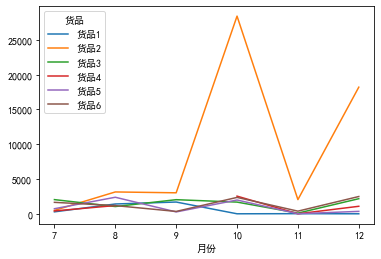

In [36]:
#2，是否存在尚有潜力的销售区域
#a,月份维度
data1 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data1.plot(kind='line')
#货品2在10月和12月销量猛增，原因猜测有二，1：公司加大了营销力度。2：公司拓展了新的市场

In [37]:
#b,不同的区域
data1 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data1
#从销售区域来看，每种货品的销售区域有1到3个，货品1有3个销售区域，货品2有2个销售区域，其余货品有1个销售区域

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


In [39]:
#c,月份和区域
data1 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data1['货品2']
#货品2在10月和12月销量猛增的原因是，在原有的销售区域（华东）销量猛增
#同样可以分析出，货品2在7,8,9,11月份有巨大的增长空间，可以适当的增加营销力度

月份  销售区域
7   华东        489.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        2.0
8   华东       1640.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚     1503.0
9   华东       3019.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
10  华东      28420.0
    华北          NaN
    泰国          NaN
    西北          NaN
    马来西亚        NaN
11  华东       2041.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        1.0
12  华东      18202.0
    华北          NaN
    华南          NaN
    泰国          NaN
    西北          NaN
    马来西亚        3.0
Name: 货品2, dtype: float64

In [52]:
#3，商品是否存在质量问题
data['货品用户反馈']= data['货品用户反馈'].str.strip()  #取出首尾空格
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
data1['拒货率']=data1['拒货']/data1.sum(axis=1)
data1['返修率']=data1['返修']/data1.sum(axis=1)
data1['合格率']=data1['质量合格']/data1.sum(axis=1)
data1.sort_values(['合格率','返修率','拒货率'],ascending=False)
#说明货品3,6,5合格率均较高，返修率比较低，说明质量还可以
#货品1,2,4合格率较低，返修率较高，质量存在一定问题，需要改善
#货品2在马来西亚的拒货率最高，同时，货品2在马来西亚的按时交货率也最低
#猜测，马来西亚人对送货的时效性要求较高，如果达不到，往往考虑拒货。
#考虑到货品2主要在华东地区销量大，考虑增大在华东地区的投入，减少在马来西亚的投入

<ipython-input-52-b1ba551dc596>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品用户反馈']= data['货品用户反馈'].str.strip()  #取出首尾空格


货品用户反馈      拒货   质量合格    返修       拒货率       返修率       合格率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.130252  0.079788  0.789219
货品6 马来西亚  56.0  246.0  14.0  0.177215  0.044279  0.777936
货品5 泰国    14.0  144.0  29.0  0.074866  0.155018  0.769108
货品2 华东    72.0  184.0  51.0  0.234528  0.165997  0.598568
货品1 华南     5.0    4.0   2.0  0.454545  0.174603  0.343963
    西北     NaN    1.0   2.0       NaN  0.666667  0.272727
    华北     NaN    3.0  12.0       NaN  0.800000  0.189873
货品4 西北     NaN    9.0  49.0       NaN  0.844828  0.152945
货品2 马来西亚   6.0    1.0   3.0  0.600000  0.283019  0.091886